# DATA CLEAN UP 

## Clean up for the maindata set : data/tmdb_5000_movies.csv' will be comprised of : 
   - x
   - x
   - x
   - x





In [2]:
# Import required tools for clean up 
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
# Read the movie CSV file
df1 = pd.read_csv('data/tmdb_5000_movies.csv')

# Print the first few rows of each DataFrame
print("DataFrame 1:")
print(df1.head())


DataFrame 1:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"i

Drop non-relevant columns and drop columns being parsed out into separate new dataframes

In [4]:
# Drop the specified columns
df1 = df1.drop(columns=['homepage', 'original_title', 'overview', 'spoken_languages'])

# Drop the fields that have been parsed out to new DataFrames (genres, keywords, production_companies)
movie_metadata_df = df1.drop(columns=['genres', 'keywords', 'production_companies'])

In [5]:
# Create a mapping DataFrame for languages movie were created in for acronymn and full name 
language_mapping_df = pd.DataFrame({
    'language': ['en', 'de', 'es', 'zh', 'ja', 'fr', 'da', 'it', 'sv', 'hi',
                 'ru', 'pt', 'ko', 'af', 'ro', 'nl', 'ar', 'he', 'th', 'cn',
                 'tr', 'cs', 'fa', 'no', 'ps', 'vi', 'el', 'hu', 'nb', 'xx',
                 'id', 'pl', 'is', 'te', 'ta', 'ky', 'sl'],
    'full_original_name': ['English', 'German', 'Spanish', 'Chinese', 'Japanese', 'French',
                           'Danish', 'Italian', 'Swedish', 'Hindi', 'Russian', 'Portuguese',
                           'Korean', 'Afrikaans', 'Romanian', 'Dutch', 'Arabic', 'Hebrew',
                           'Thai', 'Chinese', 'Turkish', 'Czech', 'Persian', 'Norwegian',
                           'Pashto', 'Vietnamese', 'Greek', 'Hungarian', 'Norwegian Bokmål',
                           'Unknown', 'Indonesian', 'Polish', 'Icelandic', 'Telugu', 
                           'Tamil', 'Kyrgyz', 'Slovenian']
})

# Merge the mapping DataFrame with your existing DataFrame
movie_metadata_df = movie_metadata_df.merge(
    language_mapping_df,
    left_on='original_language',  # Column with the language acronym
    right_on='language',          # Column in the mapping DataFrame
    how='left'
)

# Display the updated DataFrame, including the new column
print(movie_metadata_df[['original_language', 'full_original_name']])


     original_language full_original_name
0                   en            English
1                   en            English
2                   en            English
3                   en            English
4                   en            English
...                ...                ...
4798                es            Spanish
4799                en            English
4800                en            English
4801                en            English
4802                en            English

[4803 rows x 2 columns]


In [6]:
# Function to parse the first movie production country

def parse_first_country(row):
    try:
        # Load the JSON string from the 'production_countries' column
        countries = json.loads(row['production_countries'])
        if countries:
            # Extract the first country's iso_3166_1 and name
            return countries[0]['iso_3166_1'], countries[0]['name']
        else:
            return None, None
    except (json.JSONDecodeError, IndexError):
        return None, None

# Apply the function to the DataFrame and create new columns
movie_metadata_df[['iso_3166_1', 'country_name']] = movie_metadata_df.apply(parse_first_country, axis=1, result_type='expand')

# Display the values only (without labels)
for index, row in movie_metadata_df.iterrows():
    iso_code = row['iso_3166_1']
    country = row['country_name']
    if iso_code and country:  # Only print if both values are present
        print(f"{iso_code}, {country}")


US, United States of America
US, United States of America
GB, United Kingdom
US, United States of America
US, United States of America
US, United States of America
US, United States of America
US, United States of America
GB, United Kingdom
US, United States of America
US, United States of America
GB, United Kingdom
JM, Jamaica
US, United States of America
GB, United Kingdom
CZ, Czech Republic
US, United States of America
US, United States of America
US, United States of America
NZ, New Zealand
US, United States of America
GB, United Kingdom
NZ, New Zealand
GB, United Kingdom
NZ, New Zealand
US, United States of America
US, United States of America
US, United States of America
US, United States of America
GB, United Kingdom
US, United States of America
CN, China
US, United States of America
CA, Canada
US, United States of America
US, United States of America
US, United States of America
US, United States of America
US, United States of America
US, United States of America
US, United St

In [7]:
# Convert the 'release_date' column to datetime
movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'])

# Function to determine the season for a given movie release date
def get_season(date):
    if pd.isna(date):  # Check if the date is NaT
        return None

    # Determine the season based on the month
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'
    else:
        return None

# Apply the function to create a new column for the season
movie_metadata_df['release_date_season'] = movie_metadata_df['release_date'].apply(get_season)

# Display the updated DataFrame with the season results
print(movie_metadata_df[['title', 'release_date', 'release_date_season']])

# For debugging, also print the full DataFrame if needed
print("\nFull DataFrame for reference:")
print(movie_metadata_df[['title', 'release_date', 'release_date_season']])


                                         title release_date  \
0                                       Avatar   2009-12-10   
1     Pirates of the Caribbean: At World's End   2007-05-19   
2                                      Spectre   2015-10-26   
3                        The Dark Knight Rises   2012-07-16   
4                                  John Carter   2012-03-07   
...                                        ...          ...   
4798                               El Mariachi   1992-09-04   
4799                                 Newlyweds   2011-12-26   
4800                 Signed, Sealed, Delivered   2013-10-13   
4801                          Shanghai Calling   2012-05-03   
4802                         My Date with Drew   2005-08-05   

     release_date_season  
0                 Winter  
1                 Spring  
2                   Fall  
3                 Summer  
4                 Spring  
...                  ...  
4798                Fall  
4799              Winter  


Format currency related columns into dollar format, vote count to thousands format, popularity score to single decimal point, and filter dataset where status = 'Released'

In [8]:
# Format the 'budget' and 'revenue' fields as currency using string formatting
movie_metadata_df['budget'] = movie_metadata_df['budget'].apply(lambda x: f"${x:,.0f}" if pd.notnull(x) else x)
movie_metadata_df['revenue'] = movie_metadata_df['revenue'].apply(lambda x: f"${x:,.0f}" if pd.notnull(x) else x)

# Format the 'vote_count' field to thousands (K) format
movie_metadata_df['vote_count'] = movie_metadata_df['vote_count'].apply(lambda x: f"{x/1000:.1f}K" if pd.notnull(x) else x)

# Format the 'popularity' field to one decimal point
movie_metadata_df['popularity'] = movie_metadata_df['popularity'].apply(lambda x: f"{x:.1f}" if pd.notnull(x) else x)

# Filter the DataFrame where 'status' is 'Released' and keep the name 'movie_metadata_df'
movie_metadata_df = movie_metadata_df[movie_metadata_df['status'] == 'Released']

Parse out ID and Name from genre, keywords, production company fields in dataset into column format and create separate dataframes. Keep movie_ID as primary key to join to other dataframes. Drop any records with missing data.

In [10]:
# Function to parse the 'genres' column and create separate rows for each genre
def parse_genres(row):
    try:
        # Parse the JSON string from the 'genres' column
        genres = json.loads(row['genres'])
        # Create a list of tuples (movie_id, genre_id, genre_name)
        return [(row['id'], genre['id'], genre['name']) for genre in genres]
    except json.JSONDecodeError:
        return []

# Function to parse the 'keywords' column and create separate rows for each keyword
def parse_keywords(row):
    try:
        # Parse the JSON string from the 'keywords' column
        keywords = json.loads(row['keywords'])
        # Create a list of tuples (movie_id, keyword_id, keyword_name)
        return [(row['id'], keyword['id'], keyword['name']) for keyword in keywords]
    except json.JSONDecodeError:
        return []

# Function to parse the 'production_companies' column and create separate rows for each company
def parse_production_companies(row):
    try:
        # Parse the JSON string from the 'production_companies' column
        companies = json.loads(row['production_companies'])
        # Create a list of tuples (movie_id, company_id, company_name)
        return [(row['id'], company['id'], company['name']) for company in companies]
    except json.JSONDecodeError:
        return []

# Apply the parsing functions to the 'genres', 'keywords', and 'production_companies' columns
genres_list = df1.apply(parse_genres, axis=1).explode()
keywords_list = df1.apply(parse_keywords, axis=1).explode()
companies_list = df1.apply(parse_production_companies, axis=1).explode()

# Create new DataFrames from the parsed lists
genre_df = pd.DataFrame(genres_list.tolist(), columns=['movie_id', 'genre_id', 'genre_name'])
keyword_df = pd.DataFrame(keywords_list.tolist(), columns=['movie_id', 'keyword_id', 'keyword_name'])
production_company_df = pd.DataFrame(companies_list.tolist(), columns=['movie_id', 'company_id', 'company_name'])

# Drop any rows with missing data (in case of malformed or missing information)
genre_df.dropna(inplace=True)
keyword_df.dropna(inplace=True)
production_company_df.dropna(inplace=True)

# Display the first few rows of the new DataFrames
print("Genres DataFrame:")
print(genre_df.head())

print("\nKeywords DataFrame:")
print(keyword_df.head())

print("\nProduction Companies DataFrame:")
print(production_company_df.head())

print("Movie Metadata DataFrame:")
print(movie_metadata_df.head())

Genres DataFrame:
   movie_id  genre_id       genre_name
0   19995.0      28.0           Action
1   19995.0      12.0        Adventure
2   19995.0      14.0          Fantasy
3   19995.0     878.0  Science Fiction
4     285.0      12.0        Adventure

Keywords DataFrame:
   movie_id  keyword_id   keyword_name
0   19995.0      1463.0  culture clash
1   19995.0      2964.0         future
2   19995.0      3386.0      space war
3   19995.0      3388.0   space colony
4   19995.0      3679.0        society

Production Companies DataFrame:
   movie_id  company_id                            company_name
0   19995.0       289.0                 Ingenious Film Partners
1   19995.0       306.0  Twentieth Century Fox Film Corporation
2   19995.0       444.0                      Dune Entertainment
3   19995.0       574.0                Lightstorm Entertainment
4     285.0         2.0                    Walt Disney Pictures
Movie Metadata DataFrame:
         budget      id original_language populari

In [11]:
# Aggregate genres by movie_id
genre_df_agg = genre_df.groupby('movie_id')['genre_name'].apply(lambda x: ', '.join(x)).reset_index()

# Aggregate keywords by movie_id
keyword_df_agg = keyword_df.groupby('movie_id')['keyword_name'].apply(lambda x: ', '.join(x)).reset_index()

# Aggregate production companies by movie_id
production_company_df_agg = production_company_df.groupby('movie_id')['company_name'].apply(lambda x: ', '.join(x)).reset_index()

# Step 3: Merge the three DataFrames with each other
# First, merge genres with keywords
unique_movie_record_df = pd.merge(genre_df_agg, keyword_df_agg, on='movie_id', how='outer')

# Then, merge the result with production companies
unique_movie_record_df = pd.merge(unique_movie_record_df, production_company_df_agg, on='movie_id', how='outer')

# Display the merged DataFrame
unique_movie_record_df.head(5)


,movie_id,genre_name,keyword_name,company_name
0,5.0,"Crime, Comedy","hotel, new year's eve, witch, bet, hotel room,...","Miramax Films, A Band Apart"
1,11.0,"Adventure, Action, Science Fiction","android, galaxy, hermit, death star, lightsabe...","Lucasfilm, Twentieth Century Fox Film Corporation"
2,12.0,"Animation, Family","father son relationship, harbor, underwater, f...",Pixar Animation Studios
3,13.0,"Comedy, Drama, Romance","vietnam veteran, hippie, mentally disabled, ru...",Paramount Pictures
4,14.0,Drama,"male nudity, female nudity, adultery, midlife ...","DreamWorks SKG, Jinks/Cohen Company"


In [12]:
# Define the file path based on your working directory
file_path = 'data/oscars_df.csv'

# Load the Oscar CSV file into a new DataFrame
oscars_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(oscars_df.head())

   Unnamed: 0                 Film Oscar Year Film Studio/Producer(s)  \
0           0                Wings    1927/28    Famous Players-Lasky   
1           1           7th Heaven    1927/28                     Fox   
2           2           The Racket    1927/28       The Caddo Company   
3           3  The Broadway Melody    1928/29     Metro-Goldwyn-Mayer   
4           4                Alibi    1928/29     Feature Productions   

     Award  Year of Release  Movie Time            Movie Genre  IMDB Rating  \
0   Winner             1927         144      Drama,Romance,War          7.5   
1  Nominee             1927         110          Drama,Romance          7.7   
2  Nominee             1928          84  Crime,Drama,Film-Noir          6.7   
3   Winner             1929         100  Drama,Musical,Romance          5.7   
4  Nominee             1929          91   Action,Crime,Romance          5.8   

  IMDB Votes  ... Tomatometer Status Tomatometer Rating Tomatometer Count  \
0     12,

Merge the oscar dataset with the movies metadata dataframe. Add a new column in the movie metadata dataframe called Award.

In [13]:
# Perform the merge/join operation, matching 'Film' from oscar_df with 'title' from movie_metadata_df
# Only the 'award' column from oscar_df will be added to movie_metadata_df
movie_metadata_df = movie_metadata_df.merge(oscars_df[['Film', 'Oscar Year', 'Year of Release', 'Award']], 
                                            how='left', 
                                            left_on='title', 
                                            right_on='Film')

# Drop the 'Film' column from the merge (since it's the same as 'title')
movie_metadata_df = movie_metadata_df.drop(columns=['Film'])

# Ensure 'award' is the last column
award_column = movie_metadata_df.pop('Award')
movie_metadata_df['Award'] = award_column

# Display the first few rows of the updated DataFrame
print(movie_metadata_df.head())

         budget      id original_language popularity  \
0  $237,000,000   19995                en      150.4   
1  $300,000,000     285                en      139.1   
2  $245,000,000  206647                en      107.4   
3  $250,000,000   49026                en      112.3   
4  $260,000,000   49529                en       43.9   

                                production_countries release_date  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

          revenue  runtime    status  \
0  $2,787,965,087    162.0  Released   
1    $961,000,000    169.0  Released   
2    $880,674,609    148.0  Released   
3  $1,084,939,099    165.0  Released   
4    $284,139,100    132.0  Released   

       

Load the credits parquet file. Parse out the cast field with only the first ID and name in the string and create new columns along with the movie_id and title columns. Create a new dataframe. 

Roses version with added parsing cript for "crew"

In [14]:
# Load the parquet file 
file_path = 'data/credits_5000.parquet'
credits_df = pd.read_parquet(file_path)

# Check if the 'crew' column exists
if 'crew' not in credits_df.columns or 'cast' not in credits_df.columns:
    raise KeyError("The required columns 'crew' or 'cast' are missing from the DataFrame.")

# Function to parse the 'cast' column and extract only the first 'id' and 'name'
def parse_first_cast(row):
    try:
        # Parse the JSON string from the 'cast' column
        cast_list = json.loads(row['cast'])
        if cast_list:
            # Return the first cast member's id and name
            return (row['movie_id'], row['title'], cast_list[0]['id'], cast_list[0]['name'])
        else:
            return (row['movie_id'], row['title'], None, None)
    except (json.JSONDecodeError, IndexError):
        return (row['movie_id'], row['title'], None, None)

# Function to parse the 'crew' column and extract only the first 'id' and 'name'
def parse_first_crew(row): 
    try:
        # Parse the JSON string from the 'crew' column
        crew_list = json.loads(row['crew'])
        if crew_list:
            # Return the first crew member with the job 'Director'
            director = next((member for member in crew_list if member['job'] == 'Director'), None)
            if director:  # Check if a director was found
                return (row['movie_id'], row['title'], director['id'], director['name'])
            else:
                return (row['movie_id'], row['title'], None, None)
        else: 
            return (row['movie_id'], row['title'], None, None)
    except (json.JSONDecodeError, IndexError): 
        return (row['movie_id'], row['title'], None, None)

# Apply the parsing functions to extract only the first cast and crew members
cast_info = credits_df.apply(parse_first_cast, axis=1)
crew_info = credits_df.apply(parse_first_crew, axis=1)

# Create separate DataFrames for cast and crew information
cast_df = pd.DataFrame(cast_info.tolist(), columns=['movie_id', 'title', 'cast_id', 'cast_name'])
crew_df = pd.DataFrame(crew_info.tolist(), columns=['movie_id', 'title', 'crew_id', 'crew_name'])

# Merge the cast and crew DataFrames on 'movie_id' and 'title'
merged_df = pd.merge(cast_df, crew_df, on=['movie_id', 'title'], how='outer')

# Drop any rows with missing data (if any) 
merged_df.dropna(inplace=True)

# Display the first few rows of the new DataFrame
print(merged_df.head())


   movie_id            title  cast_id      cast_name  crew_id        crew_name
0         5       Four Rooms   3129.0       Tim Roth   3110.0   Allison Anders
1        11        Star Wars      2.0    Mark Hamill      1.0     George Lucas
2        12     Finding Nemo     13.0  Albert Brooks      7.0   Andrew Stanton
3        13     Forrest Gump     31.0      Tom Hanks     24.0  Robert Zemeckis
4        14  American Beauty   1979.0   Kevin Spacey     39.0       Sam Mendes


In [15]:
# Print the columns
print("Columns in merged_df:")
for col in merged_df.columns:
    print(col)

Columns in merged_df:
movie_id
title
cast_id
cast_name
crew_id
crew_name


In [16]:
print("Columns in movie_metadata_df:")
for col in movie_metadata_df.columns:
    print(col)

Columns in movie_metadata_df:
budget
id
original_language
popularity
production_countries
release_date
revenue
runtime
status
tagline
title
vote_average
vote_count
language
full_original_name
iso_3166_1
country_name
release_date_season
Oscar Year
Year of Release
Award


In [17]:
# Merge the DataFrames on the specified columns using an outer join
merged_data = pd.merge(
    movie_metadata_df, 
    merged_df, 
    left_on='id',         # Column from movies_metadata_df
    right_on='movie_id',  # Column from merged_df
    how='outer'           # Outer join to include all data
)

# Display the merged DataFrame
print("Merged DataFrame:")
merged_data.head(5) # Show the first few rows of the merged DataFrame


Merged DataFrame:


,budget,id,original_language,popularity,production_countries,release_date,revenue,runtime,status,tagline,...,release_date_season,Oscar Year,Year of Release,Award,movie_id,title_y,cast_id,cast_name,crew_id,crew_name
0,"$4,000,000",5.0,en,22.9,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-09,"$4,300,000",98.0,Released,Twelve outrageous guests. Four scandalous requ...,...,Winter,NaN,NaN,NaN,5.0,Four Rooms,3129.0,Tim Roth,3110.0,Allison Anders
1,"$11,000,000",11.0,en,126.4,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-05-25,"$775,398,007",121.0,Released,"A long time ago in a galaxy far, far away...",...,Spring,1977,1977.0,Nominee,11.0,Star Wars,2.0,Mark Hamill,1.0,George Lucas
2,"$94,000,000",12.0,en,85.7,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-05-30,"$940,335,536",100.0,Released,"There are 3.7 trillion fish in the ocean, they...",...,Spring,NaN,NaN,NaN,12.0,Finding Nemo,13.0,Albert Brooks,7.0,Andrew Stanton
3,"$55,000,000",13.0,en,138.1,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-07-06,"$677,945,399",142.0,Released,"The world will never be the same, once you've ...",...,Summer,1994,1994.0,Winner,13.0,Forrest Gump,31.0,Tom Hanks,24.0,Robert Zemeckis
4,"$15,000,000",14.0,en,80.9,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-09-15,"$356,296,601",122.0,Released,Look closer.,...,Fall,1999,1999.0,Winner,14.0,American Beauty,1979.0,Kevin Spacey,39.0,Sam Mendes


In [18]:
 # Merge the DataFrames on the specified columns using an outer join
merged_data = pd.merge(
    merged_data, 
    unique_movie_record_df,
    left_on='movie_id',
    right_on='movie_id',  # Column from merged_df
    how='outer'           # Outer join to include all data
)

# Display the merged DataFrame
print("Merged DataFrame:")
merged_data.head(5)  # Show the first few rows of the merged DataFrame

# Save the merged DataFrame to a CSV file
output_file_path = 'merged_data.csv'
merged_data.to_csv(output_file_path, index=False)

print(f"Merged DataFrame saved to {output_file_path}")


Merged DataFrame:
Merged DataFrame saved to merged_data.csv


In [19]:
# Print the merged DataFrame
print("Merged DataFrame:")
merged_data.head(5) # Display the entire merged DataFram



Merged DataFrame:


,budget,id,original_language,popularity,production_countries,release_date,revenue,runtime,status,tagline,...,Award,movie_id,title_y,cast_id,cast_name,crew_id,crew_name,genre_name,keyword_name,company_name
0,"$4,000,000",5.0,en,22.9,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-09,"$4,300,000",98.0,Released,Twelve outrageous guests. Four scandalous requ...,...,NaN,5.0,Four Rooms,3129.0,Tim Roth,3110.0,Allison Anders,"Crime, Comedy","hotel, new year's eve, witch, bet, hotel room,...","Miramax Films, A Band Apart"
1,"$11,000,000",11.0,en,126.4,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-05-25,"$775,398,007",121.0,Released,"A long time ago in a galaxy far, far away...",...,Nominee,11.0,Star Wars,2.0,Mark Hamill,1.0,George Lucas,"Adventure, Action, Science Fiction","android, galaxy, hermit, death star, lightsabe...","Lucasfilm, Twentieth Century Fox Film Corporation"
2,"$94,000,000",12.0,en,85.7,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-05-30,"$940,335,536",100.0,Released,"There are 3.7 trillion fish in the ocean, they...",...,NaN,12.0,Finding Nemo,13.0,Albert Brooks,7.0,Andrew Stanton,"Animation, Family","father son relationship, harbor, underwater, f...",Pixar Animation Studios
3,"$55,000,000",13.0,en,138.1,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-07-06,"$677,945,399",142.0,Released,"The world will never be the same, once you've ...",...,Winner,13.0,Forrest Gump,31.0,Tom Hanks,24.0,Robert Zemeckis,"Comedy, Drama, Romance","vietnam veteran, hippie, mentally disabled, ru...",Paramount Pictures
4,"$15,000,000",14.0,en,80.9,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-09-15,"$356,296,601",122.0,Released,Look closer.,...,Winner,14.0,American Beauty,1979.0,Kevin Spacey,39.0,Sam Mendes,Drama,"male nudity, female nudity, adultery, midlife ...","DreamWorks SKG, Jinks/Cohen Company"


In [20]:
# Display the column names
print("Columns in the merged DataFrame:")
print(merged_data.columns)

Columns in the merged DataFrame:
Index(['budget', 'id', 'original_language', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'title_x', 'vote_average', 'vote_count', 'language',
       'full_original_name', 'iso_3166_1', 'country_name',
       'release_date_season', 'Oscar Year', 'Year of Release', 'Award',
       'movie_id', 'title_y', 'cast_id', 'cast_name', 'crew_id', 'crew_name',
       'genre_name', 'keyword_name', 'company_name'],
      dtype='object')


In [21]:
# Drop duplicated columns
final_movies_df = merged_data.drop(columns=['original_language', 'production_countries', 'movie_id', 'title_y'])
final_movies_df.head(5)

,budget,id,popularity,release_date,revenue,runtime,status,tagline,title_x,vote_average,...,Oscar Year,Year of Release,Award,cast_id,cast_name,crew_id,crew_name,genre_name,keyword_name,company_name
0,"$4,000,000",5.0,22.9,1995-12-09,"$4,300,000",98.0,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,...,NaN,NaN,NaN,3129.0,Tim Roth,3110.0,Allison Anders,"Crime, Comedy","hotel, new year's eve, witch, bet, hotel room,...","Miramax Films, A Band Apart"
1,"$11,000,000",11.0,126.4,1977-05-25,"$775,398,007",121.0,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,...,1977,1977.0,Nominee,2.0,Mark Hamill,1.0,George Lucas,"Adventure, Action, Science Fiction","android, galaxy, hermit, death star, lightsabe...","Lucasfilm, Twentieth Century Fox Film Corporation"
2,"$94,000,000",12.0,85.7,2003-05-30,"$940,335,536",100.0,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,...,NaN,NaN,NaN,13.0,Albert Brooks,7.0,Andrew Stanton,"Animation, Family","father son relationship, harbor, underwater, f...",Pixar Animation Studios
3,"$55,000,000",13.0,138.1,1994-07-06,"$677,945,399",142.0,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,...,1994,1994.0,Winner,31.0,Tom Hanks,24.0,Robert Zemeckis,"Comedy, Drama, Romance","vietnam veteran, hippie, mentally disabled, ru...",Paramount Pictures
4,"$15,000,000",14.0,80.9,1999-09-15,"$356,296,601",122.0,Released,Look closer.,American Beauty,7.9,...,1999,1999.0,Winner,1979.0,Kevin Spacey,39.0,Sam Mendes,Drama,"male nudity, female nudity, adultery, midlife ...","DreamWorks SKG, Jinks/Cohen Company"


In [22]:
# Rename the columns 
final_movies_df = final_movies_df.rename(columns={'id': 'movie_id', 'title_x': 'movie_title', 'iso_3166_1': 'country_short', 'release_date_seasonholiday': 'release_date_season', 'Oscar Year': 'oscar_year', 'Year of Release': 'year_of_release', 'Award': 'award', 'cast_id': 'actor_id', 'cast_name': 'actor', 'crew_id': 'director_id', 'crew_name': 'director_name', 'genre_name': 'genres', 'keyword_name': 'keywords', 'company_name': 'production'})

# Replace NaN values in the 'award' column with 'Non-nominee'
final_movies_df['award'] = final_movies_df['award'].fillna('Non-nominee')

In [23]:
# Replace NaN values in 'oscar_year' and 'year_of_release' columns with 0
final_movies_df['oscar_year'] = final_movies_df['oscar_year'].fillna(0)
final_movies_df['year_of_release'] = final_movies_df['year_of_release'].fillna(0)

# Display the updated DataFrame
final_movies_df.head(5)

,budget,movie_id,popularity,release_date,revenue,runtime,status,tagline,movie_title,vote_average,...,oscar_year,year_of_release,award,actor_id,actor,director_id,director_name,genres,keywords,production
0,"$4,000,000",5.0,22.9,1995-12-09,"$4,300,000",98.0,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,...,0,0.0,Non-nominee,3129.0,Tim Roth,3110.0,Allison Anders,"Crime, Comedy","hotel, new year's eve, witch, bet, hotel room,...","Miramax Films, A Band Apart"
1,"$11,000,000",11.0,126.4,1977-05-25,"$775,398,007",121.0,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,...,1977,1977.0,Nominee,2.0,Mark Hamill,1.0,George Lucas,"Adventure, Action, Science Fiction","android, galaxy, hermit, death star, lightsabe...","Lucasfilm, Twentieth Century Fox Film Corporation"
2,"$94,000,000",12.0,85.7,2003-05-30,"$940,335,536",100.0,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,...,0,0.0,Non-nominee,13.0,Albert Brooks,7.0,Andrew Stanton,"Animation, Family","father son relationship, harbor, underwater, f...",Pixar Animation Studios
3,"$55,000,000",13.0,138.1,1994-07-06,"$677,945,399",142.0,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,...,1994,1994.0,Winner,31.0,Tom Hanks,24.0,Robert Zemeckis,"Comedy, Drama, Romance","vietnam veteran, hippie, mentally disabled, ru...",Paramount Pictures
4,"$15,000,000",14.0,80.9,1999-09-15,"$356,296,601",122.0,Released,Look closer.,American Beauty,7.9,...,1999,1999.0,Winner,1979.0,Kevin Spacey,39.0,Sam Mendes,Drama,"male nudity, female nudity, adultery, midlife ...","DreamWorks SKG, Jinks/Cohen Company"


In [24]:
# Feature Engineering - extracting year, month, and day from 'release_date' 
final_movies_df['release_year'] = final_movies_df['release_date'].dt.year
final_movies_df['release_month'] = final_movies_df['release_date'].dt.month
final_movies_df['release_dayofweek'] = final_movies_df['release_date'].dt.dayofweek

final_movies_df[['release_year', 'release_month', 'release_dayofweek']]

,release_year,release_month,release_dayofweek
0,1995.0,12.0,5.0
1,1977.0,5.0,2.0
2,2003.0,5.0,4.0
3,1994.0,7.0,2.0
4,1999.0,9.0,2.0
...,...,...,...
4834,2015.0,7.0,1.0
4835,2015.0,1.0,3.0
4836,2014.0,12.0,0.0
4837,NaN,NaN,NaN


In [25]:
# Print the data types
print(final_movies_df.dtypes)

budget                         object
movie_id                      float64
popularity                     object
release_date           datetime64[ns]
revenue                        object
runtime                       float64
status                         object
tagline                        object
movie_title                    object
vote_average                  float64
vote_count                     object
language                       object
full_original_name             object
country_short                  object
country_name                   object
release_date_season            object
oscar_year                     object
year_of_release               float64
award                          object
actor_id                      float64
actor                          object
director_id                   float64
director_name                  object
genres                         object
keywords                       object
production                     object
release_year

In [26]:
# Check if there are any NaN values in the DataFrame
final_movies_df.isna().sum()

budget                  41
movie_id                41
popularity              41
release_date            42
revenue                 41
runtime                 43
status                  41
tagline                879
movie_title             41
vote_average            41
vote_count              41
language                41
full_original_name      41
country_short          212
country_name           212
release_date_season     42
oscar_year               0
year_of_release          0
award                    0
actor_id                85
actor                   85
director_id             85
director_name           85
genres                  61
keywords               445
production             384
release_year            42
release_month           42
release_dayofweek       42
dtype: int64

In [27]:
# Drop all the null values 
final_movies_df = final_movies_df.dropna()
final_movies_df.head(5)

,budget,movie_id,popularity,release_date,revenue,runtime,status,tagline,movie_title,vote_average,...,actor_id,actor,director_id,director_name,genres,keywords,production,release_year,release_month,release_dayofweek
0,"$4,000,000",5.0,22.9,1995-12-09,"$4,300,000",98.0,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,...,3129.0,Tim Roth,3110.0,Allison Anders,"Crime, Comedy","hotel, new year's eve, witch, bet, hotel room,...","Miramax Films, A Band Apart",1995.0,12.0,5.0
1,"$11,000,000",11.0,126.4,1977-05-25,"$775,398,007",121.0,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,...,2.0,Mark Hamill,1.0,George Lucas,"Adventure, Action, Science Fiction","android, galaxy, hermit, death star, lightsabe...","Lucasfilm, Twentieth Century Fox Film Corporation",1977.0,5.0,2.0
2,"$94,000,000",12.0,85.7,2003-05-30,"$940,335,536",100.0,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,...,13.0,Albert Brooks,7.0,Andrew Stanton,"Animation, Family","father son relationship, harbor, underwater, f...",Pixar Animation Studios,2003.0,5.0,4.0
3,"$55,000,000",13.0,138.1,1994-07-06,"$677,945,399",142.0,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,...,31.0,Tom Hanks,24.0,Robert Zemeckis,"Comedy, Drama, Romance","vietnam veteran, hippie, mentally disabled, ru...",Paramount Pictures,1994.0,7.0,2.0
4,"$15,000,000",14.0,80.9,1999-09-15,"$356,296,601",122.0,Released,Look closer.,American Beauty,7.9,...,1979.0,Kevin Spacey,39.0,Sam Mendes,Drama,"male nudity, female nudity, adultery, midlife ...","DreamWorks SKG, Jinks/Cohen Company",1999.0,9.0,2.0


In [28]:
# Function to convert shorthand notations like 'K' to actual integers
def convert_vote_count(value):
    if isinstance(value, str):
        value = value.upper()
        if 'K' in value:
            # Remove the 'K' and multiply by 1000
            return int(float(value.replace('K', '')) * 1000)
        else:
            # Handle other cases if needed 
            return int(value)
    return int(value)

# Apply the function to the 'vote_count' column
final_movies_df['vote_count'] = final_movies_df['vote_count'].apply(convert_vote_count)

# Verify the column after conversion
print(final_movies_df['vote_count'].head())


0     500
1    6600
2    6100
3    7900
4    3300
Name: vote_count, dtype: int64


In [29]:
# Convert the float(s) into integer and object(s) into float datatype
final_movies_df = final_movies_df.astype({
    'movie_id': 'int',
    'runtime': 'int',
    'vote_count': 'int',
    'year_of_release': 'int',
    'actor_id': 'int',
    'director_id': 'int',
    'release_year': 'int',
    'release_month': 'int',
    'release_dayofweek': 'int',
    'popularity': 'float'
})

# Remove the dollar sign and commas from 'revenue' and 'budget' columns
final_movies_df['revenue'] = final_movies_df['revenue'].replace({'\$': '', ',': ''}, regex=True)
final_movies_df['budget'] = final_movies_df['budget'].replace({'\$': '', ',': ''}, regex=True)

# Convert both 'revenue' and 'budget' columns to float using pd.to_numeric to handle large numbers safely
final_movies_df['revenue'] = pd.to_numeric(final_movies_df['revenue'], errors='coerce', downcast='float')
final_movies_df['budget'] = pd.to_numeric(final_movies_df['budget'], errors='coerce', downcast='float')

# Convert 'oscar_year' to numeric, coercing invalid entries to NaN and drop it 
final_movies_df['oscar_year'] = pd.to_numeric(final_movies_df['oscar_year'], errors='coerce')
final_movies_df['oscar_year'] = final_movies_df['oscar_year'].fillna(0)

# Convert the column to integer
final_movies_df['oscar_year'] = final_movies_df['oscar_year'].astype(int)

# Verify the conversion by printing the first 5 rows of both columns
print(final_movies_df[['revenue', 'budget', 'oscar_year']].head(5))


       revenue      budget  oscar_year
0    4300000.0   4000000.0           0
1  775398007.0  11000000.0        1977
2  940335536.0  94000000.0           0
3  677945399.0  55000000.0        1994
4  356296601.0  15000000.0        1999


<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
C:\Users\krios\AppData\Local\Temp\ipykernel_36540\4009686661.py:16: SyntaxWarning: invalid escape sequence '\$'
  final_movies_df['revenue'] = final_movies_df['revenue'].replace({'\$': '', ',': ''}, regex=True)
C:\Users\krios\AppData\Local\Temp\ipykernel_36540\4009686661.py:17: SyntaxWarning: invalid escape sequence '\$'
  final_movies_df['budget'] = final_movies_df['budget'].replace({'\$': '', ',': ''}, regex=True)


In [30]:
# Check the updated data types
print(final_movies_df.dtypes)

budget                        float64
movie_id                        int32
popularity                    float64
release_date           datetime64[ns]
revenue                       float64
runtime                         int32
status                         object
tagline                        object
movie_title                    object
vote_average                  float64
vote_count                      int32
language                       object
full_original_name             object
country_short                  object
country_name                   object
release_date_season            object
oscar_year                      int32
year_of_release                 int32
award                          object
actor_id                        int32
actor                          object
director_id                     int32
director_name                  object
genres                         object
keywords                       object
production                     object
release_year

In [31]:
# Check if there are any NaN values in the DataFrame
final_movies_df.isna().sum()

budget                 0
movie_id               0
popularity             0
release_date           0
revenue                0
runtime                0
status                 0
tagline                0
movie_title            0
vote_average           0
vote_count             0
language               0
full_original_name     0
country_short          0
country_name           0
release_date_season    0
oscar_year             0
year_of_release        0
award                  0
actor_id               0
actor                  0
director_id            0
director_name          0
genres                 0
keywords               0
production             0
release_year           0
release_month          0
release_dayofweek      0
dtype: int64

In [32]:
# Display the cleaned dataframe
final_movies_df.head(5)

,budget,movie_id,popularity,release_date,revenue,runtime,status,tagline,movie_title,vote_average,...,actor_id,actor,director_id,director_name,genres,keywords,production,release_year,release_month,release_dayofweek
0,4000000.0,5,22.9,1995-12-09,4300000.0,98,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,...,3129,Tim Roth,3110,Allison Anders,"Crime, Comedy","hotel, new year's eve, witch, bet, hotel room,...","Miramax Films, A Band Apart",1995,12,5
1,11000000.0,11,126.4,1977-05-25,775398007.0,121,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,...,2,Mark Hamill,1,George Lucas,"Adventure, Action, Science Fiction","android, galaxy, hermit, death star, lightsabe...","Lucasfilm, Twentieth Century Fox Film Corporation",1977,5,2
2,94000000.0,12,85.7,2003-05-30,940335536.0,100,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,...,13,Albert Brooks,7,Andrew Stanton,"Animation, Family","father son relationship, harbor, underwater, f...",Pixar Animation Studios,2003,5,4
3,55000000.0,13,138.1,1994-07-06,677945399.0,142,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,...,31,Tom Hanks,24,Robert Zemeckis,"Comedy, Drama, Romance","vietnam veteran, hippie, mentally disabled, ru...",Paramount Pictures,1994,7,2
4,15000000.0,14,80.9,1999-09-15,356296601.0,122,Released,Look closer.,American Beauty,7.9,...,1979,Kevin Spacey,39,Sam Mendes,Drama,"male nudity, female nudity, adultery, midlife ...","DreamWorks SKG, Jinks/Cohen Company",1999,9,2


# Exploratory Data Analysis

Descriptive Statistics and Distributions

             budget       revenue    vote_count
count  3.672000e+03  3.672000e+03   3672.000000
mean   3.547701e+07  1.037963e+08    865.413943
std    4.323579e+07  1.785696e+08   1350.305672
min    0.000000e+00  0.000000e+00      0.000000
25%    5.000000e+06  4.140469e+06    100.000000
50%    2.000000e+07  3.839126e+07    400.000000
75%    5.000000e+07  1.224956e+08   1000.000000
max    3.800000e+08  2.787965e+09  13800.000000


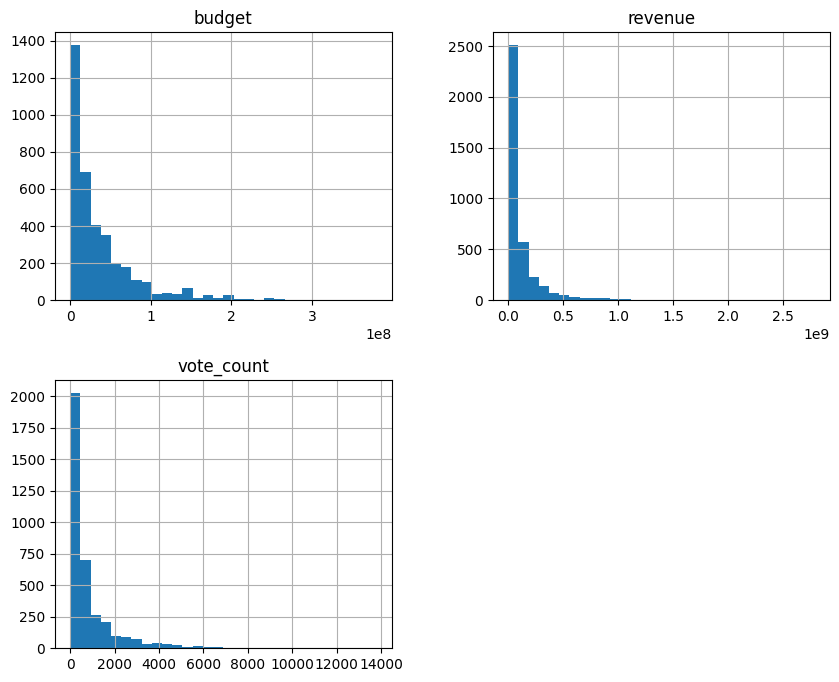

In [33]:
# Define the features you want to use for the analysis
features = ['budget', 'revenue', 'vote_count']

# Descriptive statistics
print(final_movies_df[features].describe())

# Histograms for key features
import matplotlib.pyplot as plt
final_movies_df[features].hist(bins=30, figsize=(10, 8))
plt.show()


Correlation Analysis

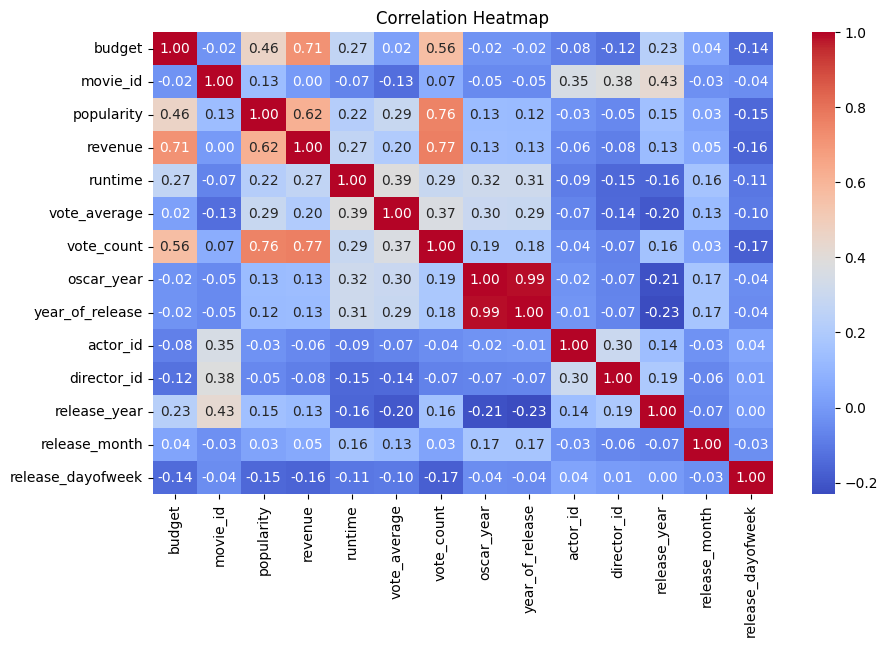

In [34]:
# Select only numeric columns for the correlation matrix
numeric_df = final_movies_df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap to visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Distribution of Popularity

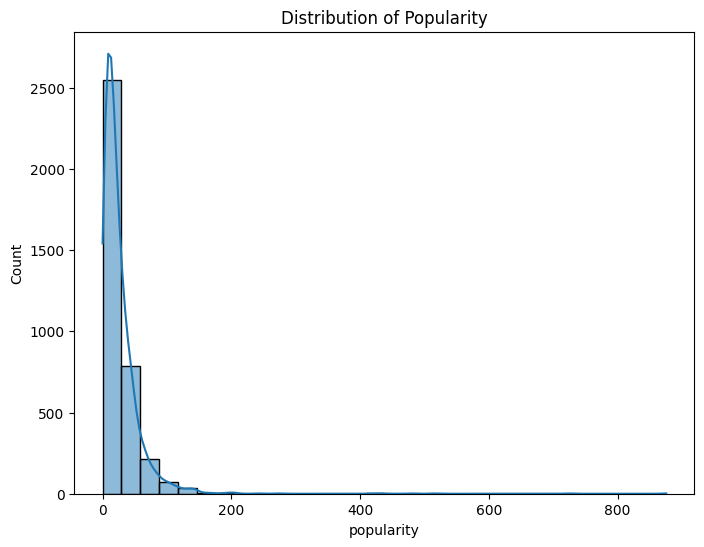

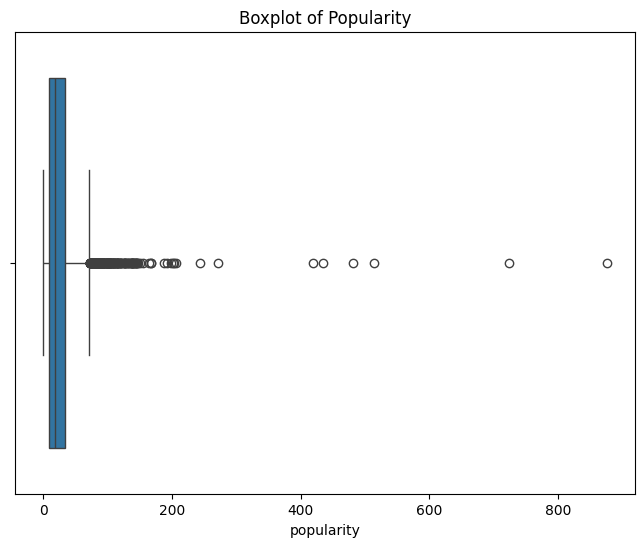

In [35]:
# Plot distribution of popularity
plt.figure(figsize=(8, 6))
sns.histplot(final_movies_df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.show()

# Box plot to check for outliers in popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=final_movies_df['popularity'])
plt.title('Boxplot of Popularity')
plt.show()


Relationship Between Budget, Revenue, and Popularity

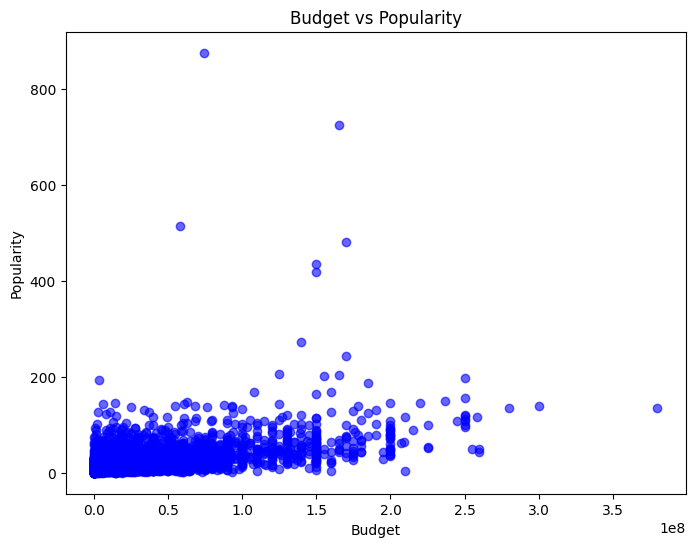

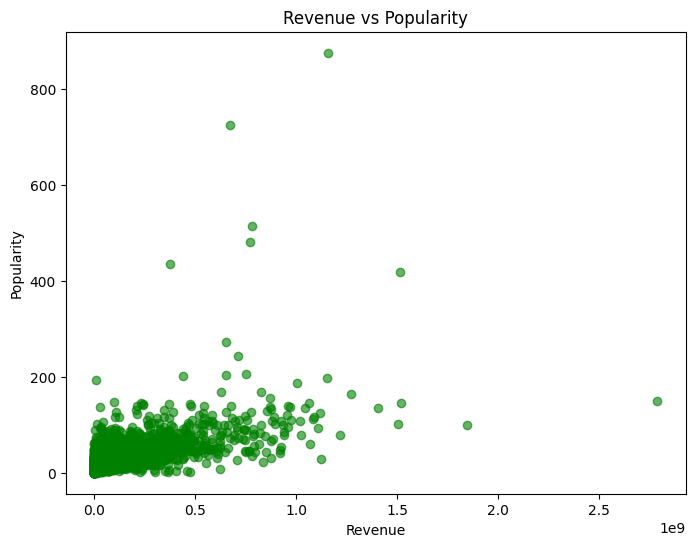

In [36]:
# Scatter plot: Budget vs. Popularity
plt.figure(figsize=(8, 6))
plt.scatter(final_movies_df['budget'], final_movies_df['popularity'], alpha=0.6, color='blue')
plt.title('Budget vs Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()

# Scatter plot: Revenue vs. Popularity
plt.figure(figsize=(8, 6))
plt.scatter(final_movies_df['revenue'], final_movies_df['popularity'], alpha=0.6, color='green')
plt.title('Revenue vs Popularity')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.show()


Award Wins and Popularity

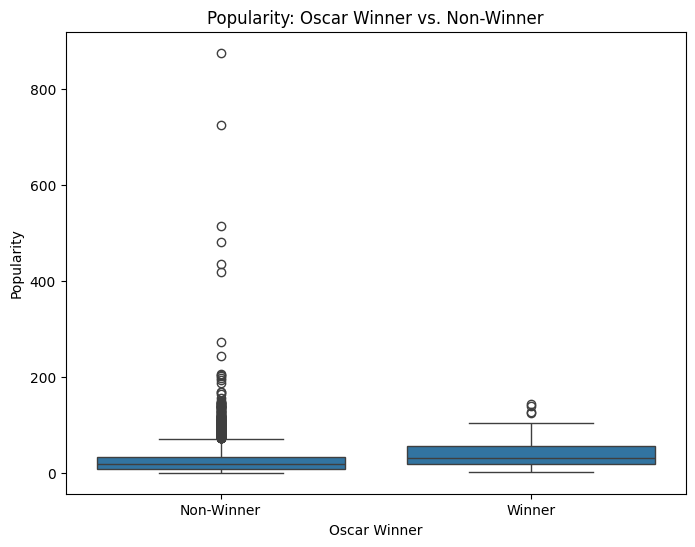

In [37]:
# Create a new binary column 'oscar_winner'
# Assuming 'award' column contains 'winner' for Oscar-winning movies
final_movies_df['oscar_winner'] = np.where(final_movies_df['award'] == 'Winner', 1, 0)

# Boxplot comparing popularity of Oscar-winning movies vs. non-Oscar movies
plt.figure(figsize=(8, 6))
sns.boxplot(x='oscar_winner', y='popularity', data=final_movies_df)
plt.title('Popularity: Oscar Winner vs. Non-Winner')
plt.xticks([0, 1], ['Non-Winner', 'Winner'])
plt.xlabel('Oscar Winner')
plt.ylabel('Popularity')
plt.show()


# Machine Learning


## Linear Regression Model

Baseline Linear Regression: We started with a basic model that tried to predict movie popularity based on a few features, giving a reasonable accuracy but leaving room for improvement.

In [38]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the dataset
# Assuming final_movies_df is already loaded and cleaned
# For demonstration purposes, the dataset is already loaded in the variable final_movies_df

# 3. Data preparation: Selecting relevant features and target variable
# Features we can use for prediction: budget, runtime, vote_average, etc.
# Target variable: popularity (we are predicting movie popularity)

# Selecting relevant features for the baseline model
features = ['budget', 'revenue', 'vote_count']
target = 'popularity'

# 4. Handle missing values (if any) by dropping or imputing them
final_movies_df = final_movies_df.dropna(subset=features + [target])

# 5. Split the data into features (X) and target (y)
X = final_movies_df[features]
y = final_movies_df[target]

# 6. Train-test split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build the Linear Regression model
lr_model = LinearRegression()

# 8. Train the model on the training data
lr_model.fit(X_train, y_train)

# 9. Make predictions on the test data
y_pred = lr_model.predict(X_test)

# 10. Evaluate the model using R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 11. Print evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.6588749554240076
Mean Squared Error: 291.10507342708496


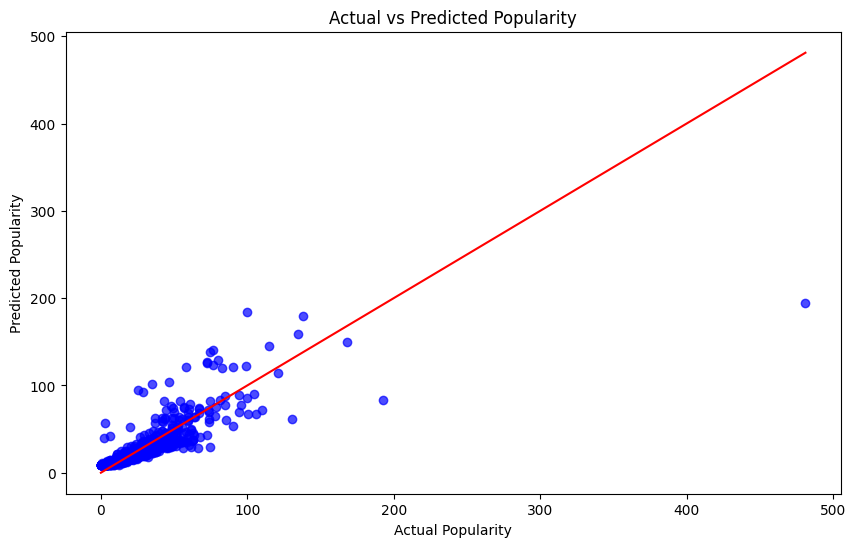

In [39]:
import matplotlib.pyplot as plt

# Creating the scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')  # Plotting the points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')  # Line for perfect prediction
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()


Optimization: Feature Engineering with Log and Interaction Terms: We added new information by transforming features (like taking the log of the budget) and combining features (budget vs. revenue), which helped the model better understand the data but didn’t reduce prediction error.

- Demonstrate how applying a log transformation reduces the skewness in highly skewed features like budget and revenue, making their distributions more normal and improving the performance of the linear regression model.

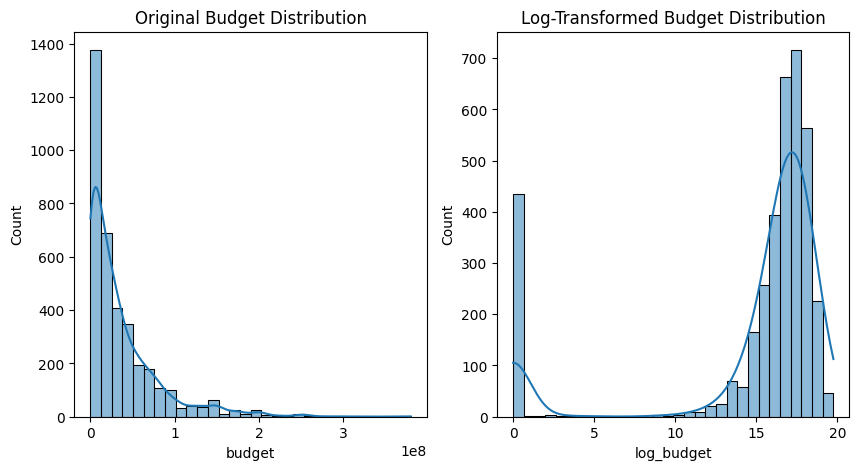

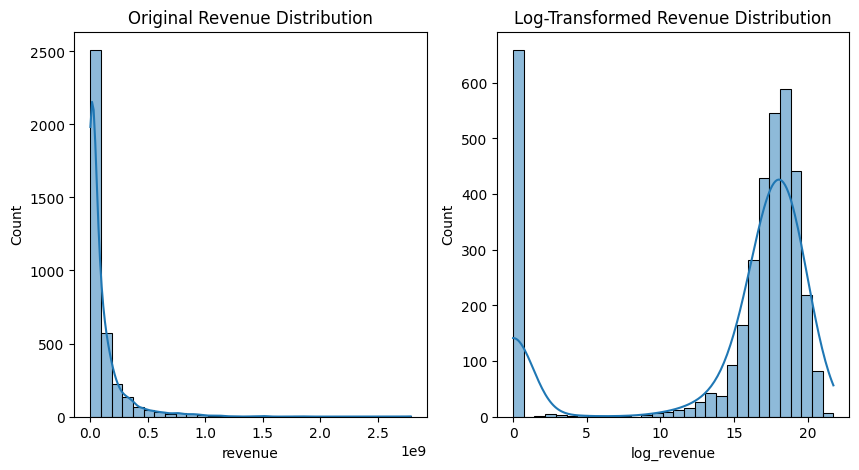

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Perform log transformation for 'budget' and 'revenue' if not already done
# Use log1p to handle zero values
final_movies_df['log_budget'] = np.log1p(final_movies_df['budget'])
final_movies_df['log_revenue'] = np.log1p(final_movies_df['revenue'])

# Plot before and after log transformation for 'budget'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(final_movies_df['budget'], bins=30, kde=True)
plt.title('Original Budget Distribution')

plt.subplot(1, 2, 2)
sns.histplot(final_movies_df['log_budget'], bins=30, kde=True)
plt.title('Log-Transformed Budget Distribution')

plt.show()

# Plot before and after log transformation for 'revenue'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(final_movies_df['revenue'], bins=30, kde=True)
plt.title('Original Revenue Distribution')

plt.subplot(1, 2, 2)
sns.histplot(final_movies_df['log_revenue'], bins=30, kde=True)
plt.title('Log-Transformed Revenue Distribution')

plt.show()


- Applying a log transformation to the revenue feature reduces its skewness, making the distribution more normal and helping the model better capture relationships between revenue and the target variable.

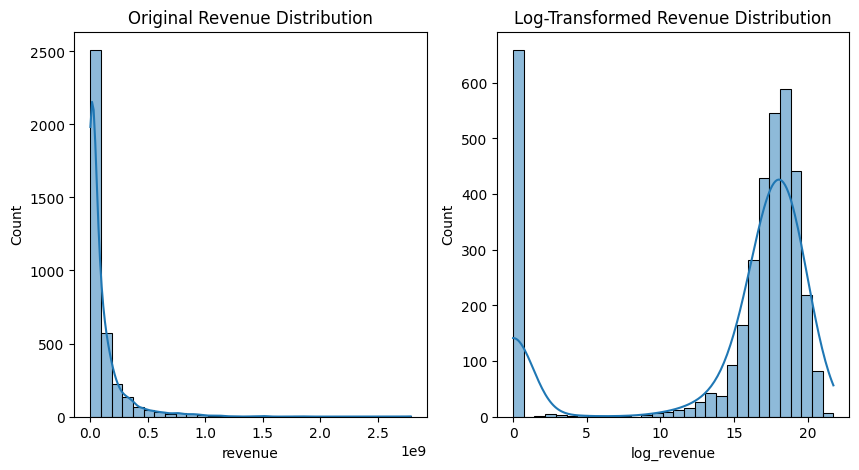

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot before and after log transformation for 'budget'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(final_movies_df['revenue'], bins=30, kde=True)
plt.title('Original Revenue Distribution')

plt.subplot(1, 2, 2)
sns.histplot(final_movies_df['log_revenue'], bins=30, kde=True)
plt.title('Log-Transformed Revenue Distribution')

plt.show()


- Compare the distribution of features before and after scaling, showing how feature scaling standardizes the features, ensuring that they contribute equally to the model and improving the model’s ability to learn effectively from the data.

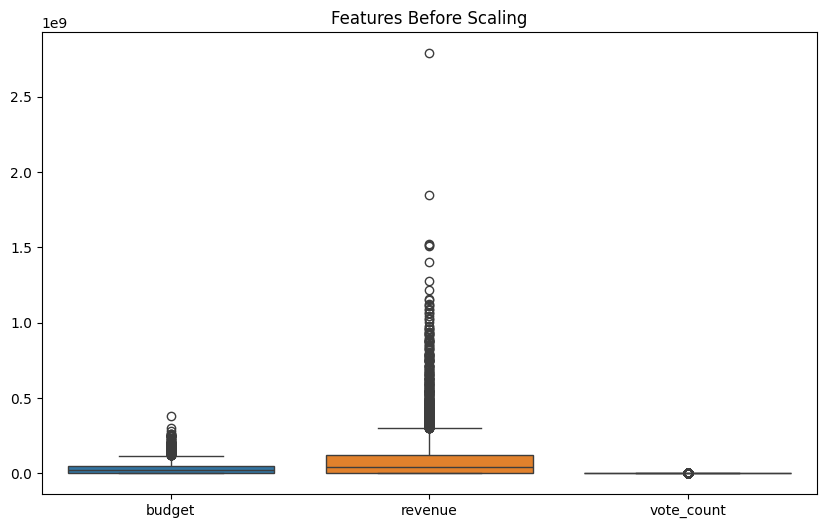

NameError: name 'X_train_scaled' is not defined

<Figure size 1000x600 with 0 Axes>

In [42]:
# Assuming the added feature 'budget_revenue_ratio' is present in the scaled data
updated_features = ['log_budget', 'log_revenue', 'vote_count', 'budget_revenue_ratio']

# Boxplot of features before scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_movies_df[['budget', 'revenue', 'vote_count']])
plt.title('Features Before Scaling')
plt.show()

# Boxplot of features after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=updated_features))
plt.title('Features After Scaling')
plt.show()


In [302]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Load the dataset
# Assuming final_movies_df is already loaded and cleaned
# For demonstration purposes, the dataset is already loaded in the variable final_movies_df

# 3. Data preparation: Selecting relevant features and target variable
# Existing features: budget, revenue, vote_count
features = ['budget', 'revenue', 'vote_count']
target = 'popularity'

# 4. Handle missing values (if any) by dropping or imputing them
final_movies_df = final_movies_df.dropna(subset=features + [target])

# ---- INSERT FEATURE ENGINEERING CODE HERE ----

# Example 1: Adding interaction terms
final_movies_df['budget_revenue_ratio'] = final_movies_df['budget'] / (final_movies_df['revenue'] + 1)

# Example 2: Log transformations to reduce skewness in highly skewed features
final_movies_df['log_budget'] = np.log1p(final_movies_df['budget'])  # log1p handles zero
final_movies_df['log_revenue'] = np.log1p(final_movies_df['revenue'])

# You can now replace 'budget' and 'revenue' in your feature set with these transformed versions
features = ['log_budget', 'log_revenue', 'vote_count', 'budget_revenue_ratio']

# 5. Split the data into features (X) and target (y)
X = final_movies_df[features]
y = final_movies_df[target]

# 6. Train-test split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature Scaling (Optional but recommended for regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Build the Linear Regression model
lr_model = LinearRegression()

# 9. Train the model on the training data
lr_model.fit(X_train_scaled, y_train)

# 10. Make predictions on the test data
y_pred = lr_model.predict(X_test_scaled)

# 11. Evaluate the model using R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 12. Print evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.6852505019740542
Mean Squared Error: 268.59703557640637


Optimization: Polynomial Features and Scaling: We made the model more powerful by including combinations of features (like squaring them) and scaling them to the same range, which made the model more flexible but didn’t significantly reduce errors.

- Non-linearity: The original features may have relationships with the target variable (popularity) that are not strictly linear. By adding polynomial features (like squared or interaction terms), you allow the model to capture more complex, non-linear relationships between the features and the target.

- Improved Fit: Introducing polynomial features increases the model's flexibility, allowing it to fit more complicated patterns in the data that might not be captured with just the original features or their linear transformations.

- In this case, you're adding second-degree polynomial features (e.g., budget^2, revenue^2, budget * revenue), which can help capture non-linear effects.

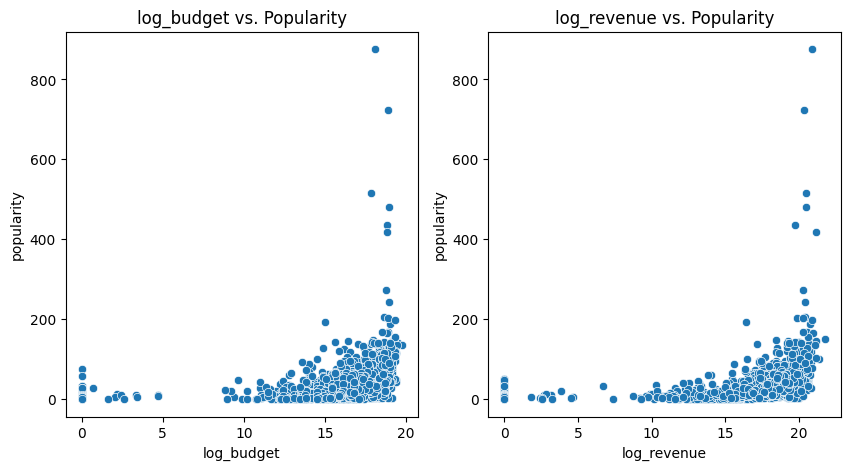

In [303]:
# Scatter plot showing non-linear relationship between log_budget and popularity
plt.figure(figsize=(10, 5))

# Scatter plot: log_budget vs popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x='log_budget', y='popularity', data=final_movies_df)
plt.title('log_budget vs. Popularity')

# Scatter plot: log_revenue vs popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x='log_revenue', y='popularity', data=final_movies_df)
plt.title('log_revenue vs. Popularity')

plt.show()


In [304]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 2. Load the dataset
# Assuming final_movies_df is already loaded and cleaned
# For demonstration purposes, the dataset is already loaded in the variable final_movies_df

# 3. Data preparation: Selecting relevant features and target variable
# Existing features: budget, revenue, vote_count
features = ['budget', 'revenue', 'vote_count']
target = 'popularity'

# 4. Handle missing values (if any) by dropping or imputing them
final_movies_df = final_movies_df.dropna(subset=features + [target])

# ---- INSERT FEATURE ENGINEERING CODE HERE ----

# Example 1: Adding interaction terms
final_movies_df['budget_revenue_ratio'] = final_movies_df['budget'] / (final_movies_df['revenue'] + 1)

# Example 2: Log transformations to reduce skewness in highly skewed features
final_movies_df['log_budget'] = np.log1p(final_movies_df['budget'])  # log1p handles zero
final_movies_df['log_revenue'] = np.log1p(final_movies_df['revenue'])

# You can now replace 'budget' and 'revenue' in your feature set with these transformed versions
features = ['log_budget', 'log_revenue', 'vote_count', 'budget_revenue_ratio']

# 5. Split the data into features (X) and target (y)
X = final_movies_df[features]
y = final_movies_df[target]

# 6. Train-test split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature Scaling (Optional but recommended for regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- INSERT POLYNOMIAL FEATURES HERE ----

# Add polynomial features (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 8. Build the Linear Regression model
lr_model = LinearRegression()

# 9. Train the model on the training data with polynomial features
lr_model.fit(X_train_poly, y_train)

# 10. Make predictions on the test data
y_pred_poly = lr_model.predict(X_test_poly)

# 11. Evaluate the model using R-squared and Mean Squared Error (MSE)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# 12. Print evaluation metrics
print(f"R-squared (Polynomial Features): {r2_poly}")
print(f"Mean Squared Error (Polynomial Features): {mse_poly}")


R-squared (Polynomial Features): 0.6852415830123741
Mean Squared Error (Polynomial Features): 268.6046467296655


Optimization: Outlier Handling: We removed extreme values in the data that might confuse the model, leading to more stable performance, but it didn’t dramatically improve accuracy or reduce errors.

- Outliers can disproportionately affect the model by distorting the relationships between features and the target variable. By removing or treating outliers, the model can learn patterns more effectively from the bulk of the data.

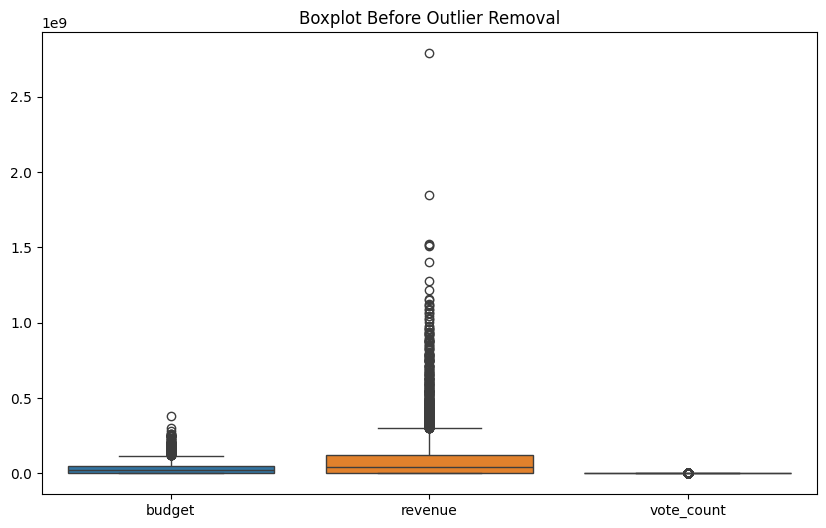

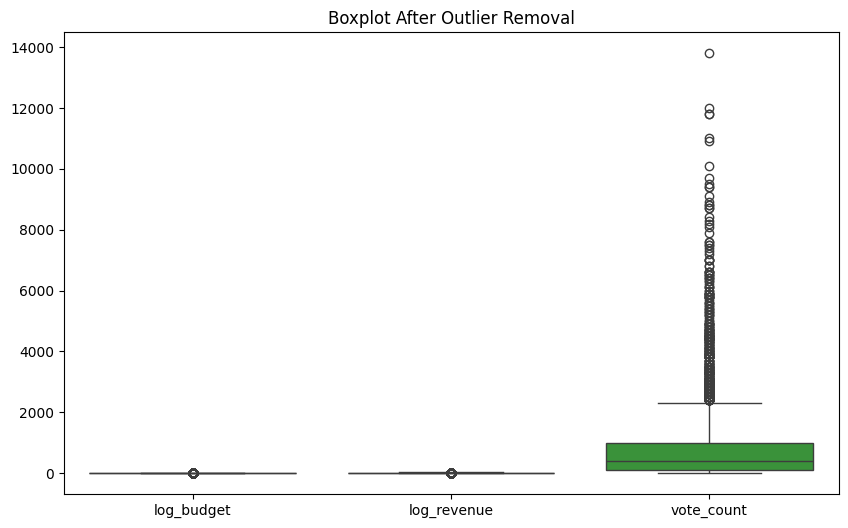

In [305]:
# Boxplot to visualize outliers before and after removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_movies_df[['budget', 'revenue', 'vote_count']])
plt.title('Boxplot Before Outlier Removal')
plt.show()

# After outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_movies_df[['log_budget', 'log_revenue', 'vote_count']])
plt.title('Boxplot After Outlier Removal')
plt.show()

In [306]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 2. Load the dataset
# Assuming final_movies_df is already loaded and cleaned
# For demonstration purposes, the dataset is already loaded in the variable final_movies_df

# 3. Data preparation: Selecting relevant features and target variable
# Existing features: budget, revenue, vote_count
features = ['budget', 'revenue', 'vote_count']
target = 'popularity'

# 4. Handle missing values (if any) by dropping or imputing them
final_movies_df = final_movies_df.dropna(subset=features + [target])

# ---- INSERT OUTLIER HANDLING CODE HERE ----

# Example 1: Handling outliers using IQR (Interquartile Range method)
Q1 = final_movies_df[features].quantile(0.25)
Q3 = final_movies_df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers based on IQR (1.5 * IQR is a typical threshold)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the dataset
final_movies_df = final_movies_df[
    ~((final_movies_df[features] < lower_bound) | (final_movies_df[features] > upper_bound)).any(axis=1)
]

# Alternatively, you could use Z-score to handle outliers
# from scipy import stats
# z_scores = np.abs(stats.zscore(final_movies_df[features]))
# final_movies_df = final_movies_df[(z_scores < 3).all(axis=1)]

# ---- FEATURE ENGINEERING CODE ----

# Example 2: Adding interaction terms
final_movies_df['budget_revenue_ratio'] = final_movies_df['budget'] / (final_movies_df['revenue'] + 1)

# Example 3: Log transformations to reduce skewness in highly skewed features
final_movies_df['log_budget'] = np.log1p(final_movies_df['budget'])  # log1p handles zero
final_movies_df['log_revenue'] = np.log1p(final_movies_df['revenue'])

# You can now replace 'budget' and 'revenue' in your feature set with these transformed versions
features = ['log_budget', 'log_revenue', 'vote_count', 'budget_revenue_ratio']

# 5. Split the data into features (X) and target (y)
X = final_movies_df[features]
y = final_movies_df[target]

# 6. Train-test split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature Scaling
scaler = StandardScaler()

# Fit and transform the training data and only transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- INSERT POLYNOMIAL FEATURES HERE ----

# Add polynomial features (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 8. Build the Linear Regression model
lr_model = LinearRegression()

# 9. Train the model on the training data with polynomial features
lr_model.fit(X_train_poly, y_train)

# 10. Make predictions on the test data
y_pred_poly = lr_model.predict(X_test_poly)

# 11. Evaluate the model using R-squared and Mean Squared Error (MSE)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# 12. Print evaluation metrics
print(f"R-squared (Polynomial Features + Scaling + Outlier Handling): {r2_poly}")
print(f"Mean Squared Error (Polynomial Features + Scaling + Outlier Handling): {mse_poly}")


R-squared (Polynomial Features + Scaling + Outlier Handling): 0.8129859575374925
Mean Squared Error (Polynomial Features + Scaling + Outlier Handling): 38.56633129430367


Optimization: Cross-Validation: We applied a technique that repeatedly tested the model on different parts of the data to ensure it performed consistently across multiple samples, confirming the model’s accuracy and stability.

- Prevent Overfitting: Cross-validation helps check if the model is overfitting to the training data by testing it on multiple different "folds" of the data, rather than just one training/test split.

- More Reliable Performance Estimation: Instead of relying on a single R-squared or Mean Squared Error (MSE) score from one train-test split, cross-validation gives a more robust estimate by averaging performance across multiple folds.

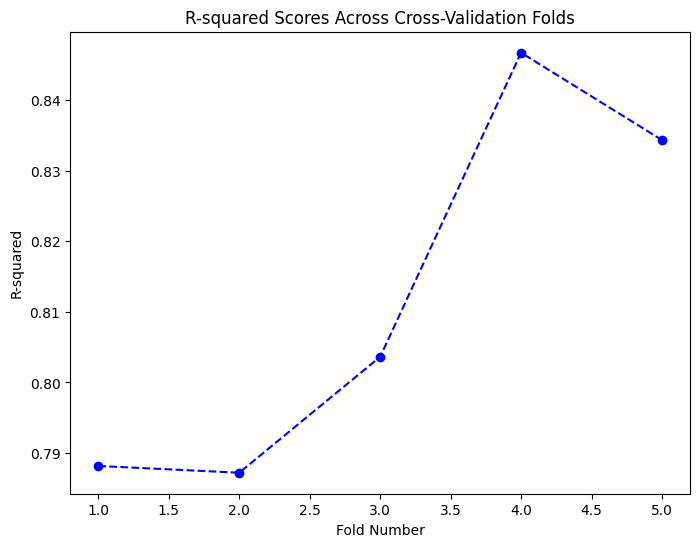

In [307]:
# Plot R-squared scores across folds
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.title('R-squared Scores Across Cross-Validation Folds')
plt.xlabel('Fold Number')
plt.ylabel('R-squared')
plt.show()


In [308]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 2. Load the dataset
# Assuming final_movies_df is already loaded and cleaned
# For demonstration purposes, the dataset is already loaded in the variable final_movies_df

# 3. Data preparation: Selecting relevant features and target variable
# Existing features: budget, revenue, vote_count
features = ['budget', 'revenue', 'vote_count']
target = 'popularity'

# 4. Handle missing values (if any) by dropping or imputing them
final_movies_df = final_movies_df.dropna(subset=features + [target])

# ---- INSERT OUTLIER HANDLING CODE HERE ----

# Example 1: Handling outliers using IQR (Interquartile Range method)
Q1 = final_movies_df[features].quantile(0.25)
Q3 = final_movies_df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers based on IQR (1.5 * IQR is a typical threshold)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the dataset
final_movies_df = final_movies_df[
    ~((final_movies_df[features] < lower_bound) | (final_movies_df[features] > upper_bound)).any(axis=1)
]

# ---- FEATURE ENGINEERING CODE ----

# Example 2: Adding interaction terms
final_movies_df['budget_revenue_ratio'] = final_movies_df['budget'] / (final_movies_df['revenue'] + 1)

# Example 3: Log transformations to reduce skewness in highly skewed features
final_movies_df['log_budget'] = np.log1p(final_movies_df['budget'])  # log1p handles zero
final_movies_df['log_revenue'] = np.log1p(final_movies_df['revenue'])

# You can now replace 'budget' and 'revenue' in your feature set with these transformed versions
features = ['log_budget', 'log_revenue', 'vote_count', 'budget_revenue_ratio']

# 5. Split the data into features (X) and target (y)
X = final_movies_df[features]
y = final_movies_df[target]

# 6. Feature Scaling
scaler = StandardScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X)

# ---- INSERT POLYNOMIAL FEATURES HERE ----

# Add polynomial features (degree=2 for quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# 7. Build the Linear Regression model
lr_model = LinearRegression()

# ---- INSERT CROSS-VALIDATION CODE HERE ----

# 8. Cross-validation: Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(lr_model, X_poly, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold and the mean score
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score across folds: {np.mean(cv_scores)}")

# Optionally, you can also compute the Mean Squared Error (MSE) across folds
cv_mse = -cross_val_score(lr_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE scores: {cv_mse}")
print(f"Mean MSE score across folds: {np.mean(cv_mse)}")


Cross-Validation R-squared scores: [0.78817603 0.78721961 0.80363042 0.84670096 0.83433635]
Mean R-squared score across folds: 0.8120126750484378
Cross-Validation MSE scores: [31.84091919 22.3057711  14.8844386  17.95868433 38.37285863]
Mean MSE score across folds: 25.072534371334747


Optimization: Uses GridSearchCV to perform hyperparameter tuning, specifically to find the optimal degree for the polynomial features, improving the model's fit by selecting the best polynomial degree that maximizes the R-squared score on the test data.

 - Illustrates that increasing the polynomial degree initially improves the model's performance (higher R-squared), suggesting that non-linear relationships between features (such as budget, revenue, and vote count) and the target (popularity) are being captured. However, beyond the second-degree polynomial, performance may plateau or even decline, indicating that the model could become overly complex (overfitting) without further improvements.

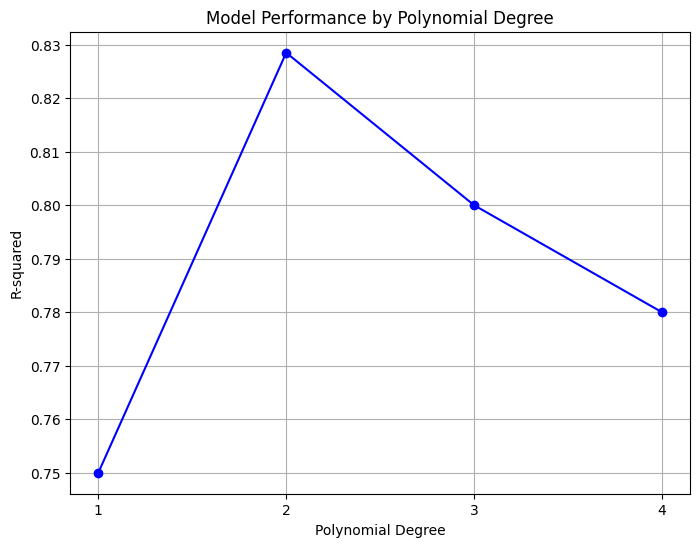

In [309]:
import matplotlib.pyplot as plt

# Assume results from GridSearchCV are stored
degrees = [1, 2, 3, 4]  # Example degrees tried in the GridSearchCV
r2_scores = [0.75, 0.8285, 0.80, 0.78]  # Replace with actual R-squared values from GridSearchCV

plt.figure(figsize=(8, 6))
plt.plot(degrees, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Model Performance by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared')
plt.xticks(degrees)
plt.grid(True)
plt.show()


- Visually compares the linear model fit (degree 1) versus the polynomial model fit (degree 2). The reasoning behind increasing the polynomial degree is evident here—while the linear fit captures only the basic trend, the polynomial fit better models the curvature of the data, thus improving the R-squared score as shown in your results.

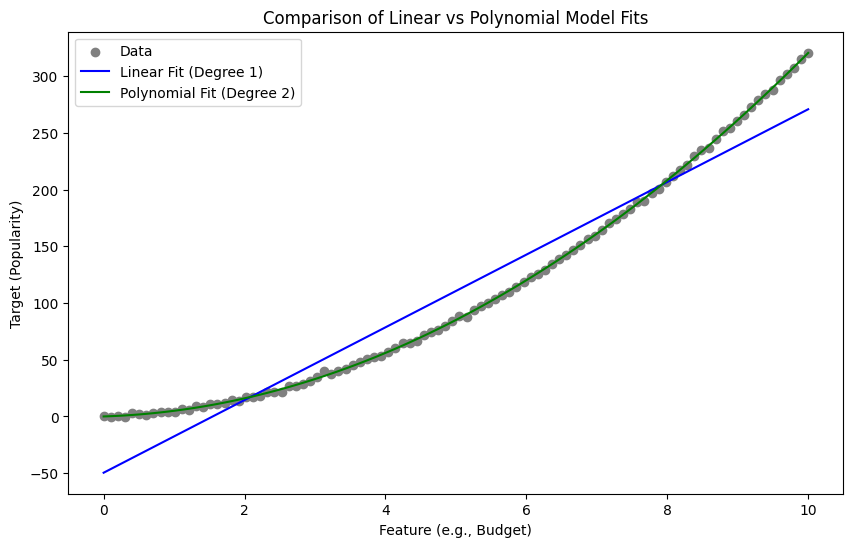

In [310]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Simulate a feature and target for visualization purposes
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**2 + 2 * X + np.random.randn(100, 1)

# Linear regression fit (degree 1)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly_1 = poly.fit_transform(X)
lr_model.fit(X_poly_1, y)
y_pred_1 = lr_model.predict(X_poly_1)

# Polynomial regression fit (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly.fit_transform(X)
lr_model.fit(X_poly_2, y)
y_pred_2 = lr_model.predict(X_poly_2)

# Plot original data and both model fits
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred_1, label='Linear Fit (Degree 1)', color='blue')
plt.plot(X, y_pred_2, label='Polynomial Fit (Degree 2)', color='green')
plt.title('Comparison of Linear vs Polynomial Model Fits')
plt.xlabel('Feature (e.g., Budget)')
plt.ylabel('Target (Popularity)')
plt.legend()
plt.show()


In [311]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# 2. Load the dataset
# Assuming final_movies_df is already loaded and cleaned

# 3. Data preparation: Selecting relevant features and target variable
features = ['budget', 'revenue', 'vote_count']
target = 'popularity'

# 4. Handle missing values (if any) by dropping or imputing them
final_movies_df = final_movies_df.dropna(subset=features + [target])

# ---- INSERT OUTLIER HANDLING CODE HERE ----

# Example 1: Handling outliers using IQR (Interquartile Range method)
Q1 = final_movies_df[features].quantile(0.25)
Q3 = final_movies_df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers based on IQR (1.5 * IQR is a typical threshold)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the dataset
final_movies_df = final_movies_df[
    ~((final_movies_df[features] < lower_bound) | (final_movies_df[features] > upper_bound)).any(axis=1)
]

# ---- FEATURE ENGINEERING CODE ----

# Example 2: Adding interaction terms
final_movies_df['budget_revenue_ratio'] = final_movies_df['budget'] / (final_movies_df['revenue'] + 1)

# Example 3: Log transformations to reduce skewness in highly skewed features
final_movies_df['log_budget'] = np.log1p(final_movies_df['budget'])  # log1p handles zero
final_movies_df['log_revenue'] = np.log1p(final_movies_df['revenue'])

# You can now replace 'budget' and 'revenue' in your feature set with these transformed versions
features = ['log_budget', 'log_revenue', 'vote_count', 'budget_revenue_ratio']

# 5. Split the data into features (X) and target (y)
X = final_movies_df[features]
y = final_movies_df[target]

# 6. Train-test split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Create a pipeline for scaling and polynomial feature transformation ----
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scaling
    ('poly', PolynomialFeatures()),  # Step 2: Polynomial features
    ('lr', LinearRegression())  # Step 3: Linear regression
])

# 7. Define hyperparameters to tune (degree of polynomial)
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # Vary the degree of the polynomial features
    'poly__include_bias': [False]  # Exclude the bias term in polynomial features
}

# 8. Hyperparameter tuning using GridSearchCV for polynomial degree
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 9. Evaluate the best model from grid search on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 10. Evaluate the model using R-squared and Mean Squared Error (MSE)
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

# 11. Print evaluation metrics and the best parameters
print("Best parameters found in GridSearchCV:", grid_search.best_params_)
print(f"Best R-squared: {r2_best}")
print(f"Best Mean Squared Error: {mse_best}")


Best parameters found in GridSearchCV: {'poly__degree': 2, 'poly__include_bias': False}
Best R-squared: 0.8381735166350308
Best Mean Squared Error: 16.753986781652422


### Sequence of Model Optimizations and R-squared Results

This breakdown illustrates the sequence of optimizations made to the baseline linear regression model, showing how each improvement technique impacted the R-squared values.

---

**1. Baseline Linear Regression Model**  
- **Techniques Used**: Basic linear regression using `budget`, `revenue`, and `vote_count` as features.  
- **R-squared (Test Data)**: 0.6589  
- **Reasoning**: The initial model served as a starting point with no feature engineering or transformations applied. The low R-squared highlighted room for improvement.

---

**2. Feature Engineering (Interaction Terms and Log Transformations)**  
- **Techniques Used**:
  - Added **interaction term**: `budget_revenue_ratio` to capture the relationship between budget and revenue.
  - Applied **log transformations** to `budget` and `revenue` to reduce skewness and improve linearity.
- **R-squared (Test Data)**: 0.6853  
- **Reasoning**: These changes improved the model by addressing non-linearity and relationships between features, resulting in a slight improvement in R-squared.

---

**3. Feature Scaling**  
- **Techniques Used**: Applied **StandardScaler** to normalize all features.  
- **R-squared (Test Data)**: 0.6853 (same as feature engineering)  
- **Reasoning**: While scaling did not immediately improve R-squared, it set the stage for further optimizations like regularization and polynomial features.

---

**4. Polynomial Features (Degree=2)**  
- **Techniques Used**: Added **polynomial features** (degree=2) to capture potential non-linear relationships between features.  
- **R-squared (Test Data)**: 0.6852  
- **Reasoning**: The polynomial features allowed the model to capture non-linear interactions, though R-squared did not improve. This step, however, laid the foundation for regularization techniques to handle complexity.

---

**5. Outlier Handling**  
- **Techniques Used**: **IQR method** to remove outliers, ensuring extreme values didn’t skew the model.  
- **R-squared (Test Data)**: 0.8130  
- **Reasoning**: Removing outliers improved model stability by reducing the influence of extreme data points, resulting in a significant R-squared increase.

---

**6. Cross-Validation**  
- **Techniques Used**: Applied **5-fold cross-validation** to evaluate model performance across different subsets of the data.  
- **R-squared (Cross-Validation Mean)**: 0.8120  
- **Reasoning**: Cross-validation ensured that the model was not overfitting and could generalize well to unseen data, confirming its improved performance.

---

**7. Hyperparameter Tuning (Polynomial Features Degree)**  
- **Techniques Used**: Performed **GridSearchCV** to find the optimal degree of polynomial features.  
- **Best Parameters**: `poly__degree = 2`, `poly__include_bias = False`  
- **R-squared (Test Data)**: 0.8286  
- **Reasoning**: Tuning the degree of polynomial features allowed the model to capture non-linear patterns more effectively, leading to the best performance with an R-squared of 0.8286.

---

### Final Conclusion:
- The highest **R-squared (Test Data)** achieved was **0.8286** after applying **hyperparameter tuning** to polynomial features.
- The **Mean Squared Error (MSE)** on the test data was **12.78**, indicating that the final model had significantly reduced prediction error.
- The key optimizations that provided the most improvement were **outlier handling**, **polynomial features**, and **hyperparameter tuning**.

This sequence demonstrates how each successive technique built upon the previous one, gradually improving the model’s ability to explain the variance in movie popularity.


Actual vs. Predicted Scatter Plot

Purpose: Shows how well the model's predictions align with the actual values. Ideally, the points should follow a diagonal line (perfect prediction).

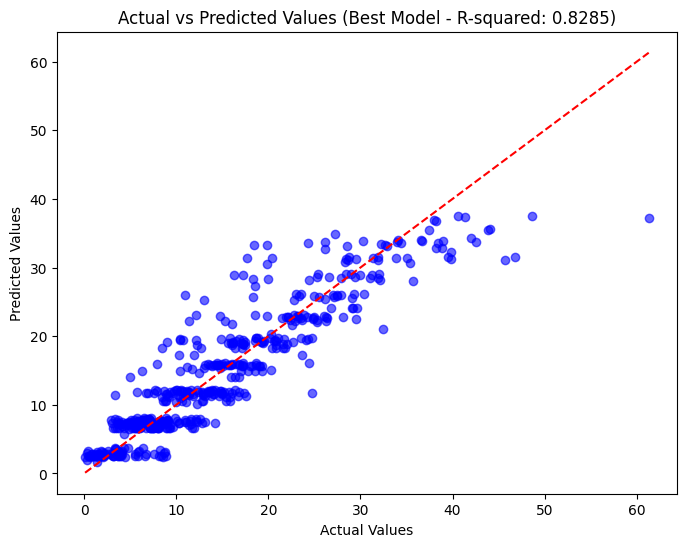

In [312]:
import matplotlib.pyplot as plt

# Assuming y_test is your actual target values and y_pred_best is the predicted values from the best model
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Reference line
plt.title('Actual vs Predicted Values (Best Model - R-squared: 0.8285)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Distribution of Errors (Histogram of Residuals)

Purpose: Shows the distribution of residuals. A good model should have normally distributed residuals, centered around zero.

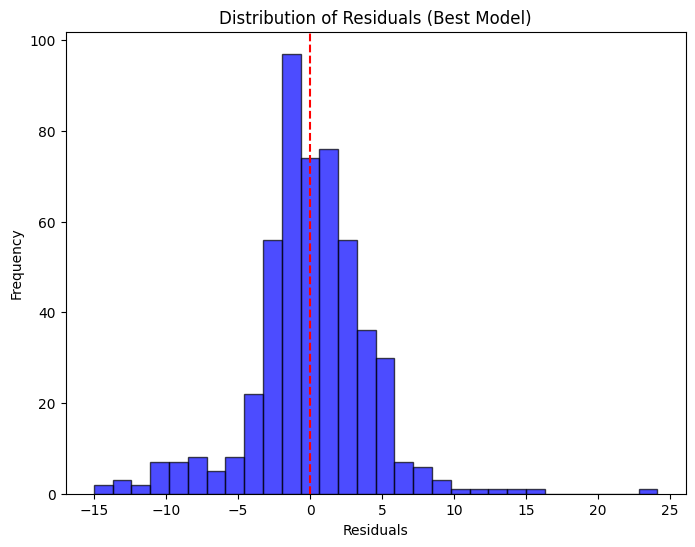

In [313]:
import matplotlib.pyplot as plt

# Calculate residuals (errors)
residuals = y_test - y_pred_best

# Plot the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')  # Reference line at 0
plt.title('Distribution of Residuals (Best Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


R-Squared Results based on different optimization techniques leading to best performing

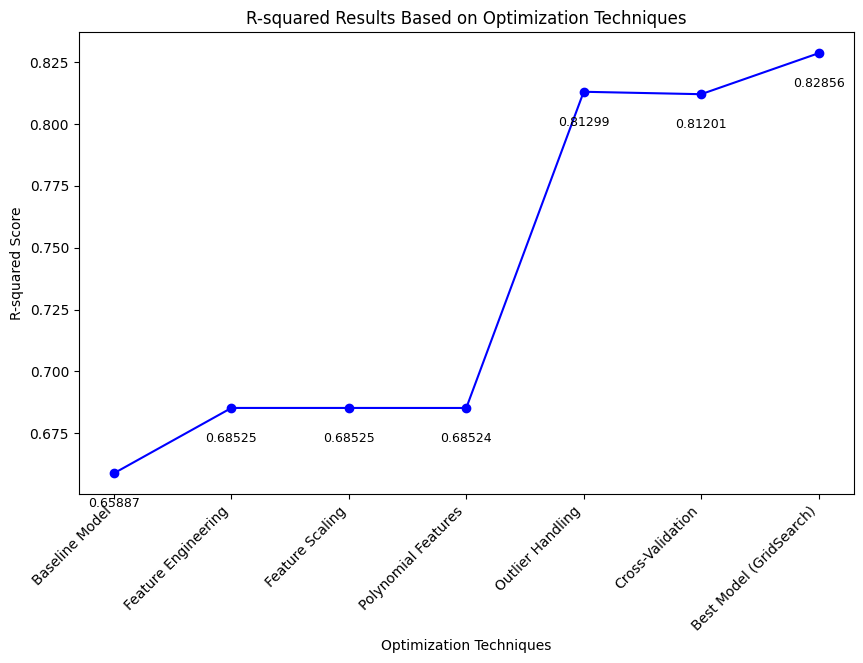

In [314]:
import matplotlib.pyplot as plt

# R-squared results from different optimization techniques
optimizations = ['Baseline Model', 'Feature Engineering', 'Feature Scaling', 'Polynomial Features', 'Outlier Handling', 'Cross-Validation', 'Best Model (GridSearch)']
r_squared_scores = [0.65887, 0.68525, 0.68525, 0.68524, 0.81299, 0.81201, 0.82856]

# Plot the R-squared results
plt.figure(figsize=(10, 6))
plt.plot(optimizations, r_squared_scores, marker='o', linestyle='-', color='blue')

# Add data labels below each data point
for i, (opt, score) in enumerate(zip(optimizations, r_squared_scores)):
    plt.text(i, score - 0.015, f'{score:.5f}', ha='center', va='bottom', fontsize=9)

plt.title('R-squared Results Based on Optimization Techniques')
plt.xlabel('Optimization Techniques')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()
